## EDA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import warnings
import colorsys
import random
import matplotlib.cm as cm

plt.style.use("fivethirtyeight")


In [20]:
df = pd.read_csv("Epileptic_featured _data.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (198, 42)


,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,104,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,...,-0.12401,0.14298,-3.6805,0.262470,0.61617,0.58529,-0.53844,-0.071407,-0.097813,1
1,116,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,...,0.41673,0.58351,-3.1111,-0.080878,-1.10330,-1.83840,0.42514,0.496830,0.712690,1
2,117,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,...,0.85930,0.15079,-2.5285,-1.685500,-1.22000,0.63104,2.56250,-0.426800,-1.241900,1
3,124,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,...,-1.02680,11.21600,-1.5565,1.613700,4.83660,6.15950,-3.88050,-1.664800,-1.540100,1
4,134,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,...,-5.06020,7.04690,-1.5676,4.731700,-1.21520,-9.56020,-5.08090,3.472300,6.459600,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      198 non-null    int64  
 1   pow_d   198 non-null    float64
 2   fr_d    198 non-null    float64
 3   cd1_d   198 non-null    float64
 4   cd2_d   198 non-null    float64
 5   cd3_d   198 non-null    float64
 6   cd4_d   198 non-null    float64
 7   cd5_d   198 non-null    float64
 8   cd6_d   198 non-null    float64
 9   pow_t   198 non-null    float64
 10  fr_t    198 non-null    float64
 11  cd1_t   198 non-null    float64
 12  cd2_t   198 non-null    float64
 13  cd3_t   198 non-null    float64
 14  cd4_t   198 non-null    float64
 15  cd5_t   198 non-null    float64
 16  cd6_t   198 non-null    float64
 17  pow_a   198 non-null    float64
 18  fr_a    198 non-null    float64
 19  cd1_a   198 non-null    float64
 20  cd2_a   198 non-null    float64
 21  cd3_a   198 non-null    float64
 22  cd

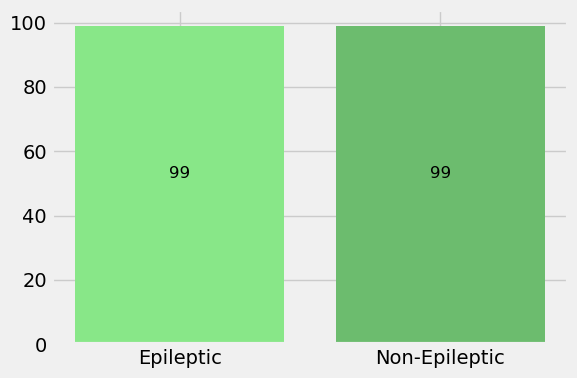

In [22]:
# Distribution of epilepsy
fig, ax = plt.subplots(1,1, figsize=(6,4))  

colors = ['#88E788', '#6CBC6E']
labels = ["Epileptic", "Non-Epileptic"]
counts = df['stat'].value_counts().values

bars = ax.bar(labels, counts, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        text=int(height),
        xy=(bar.get_x()+bar.get_width()/2, height/2),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=12
    )
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_43656\1549449820.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


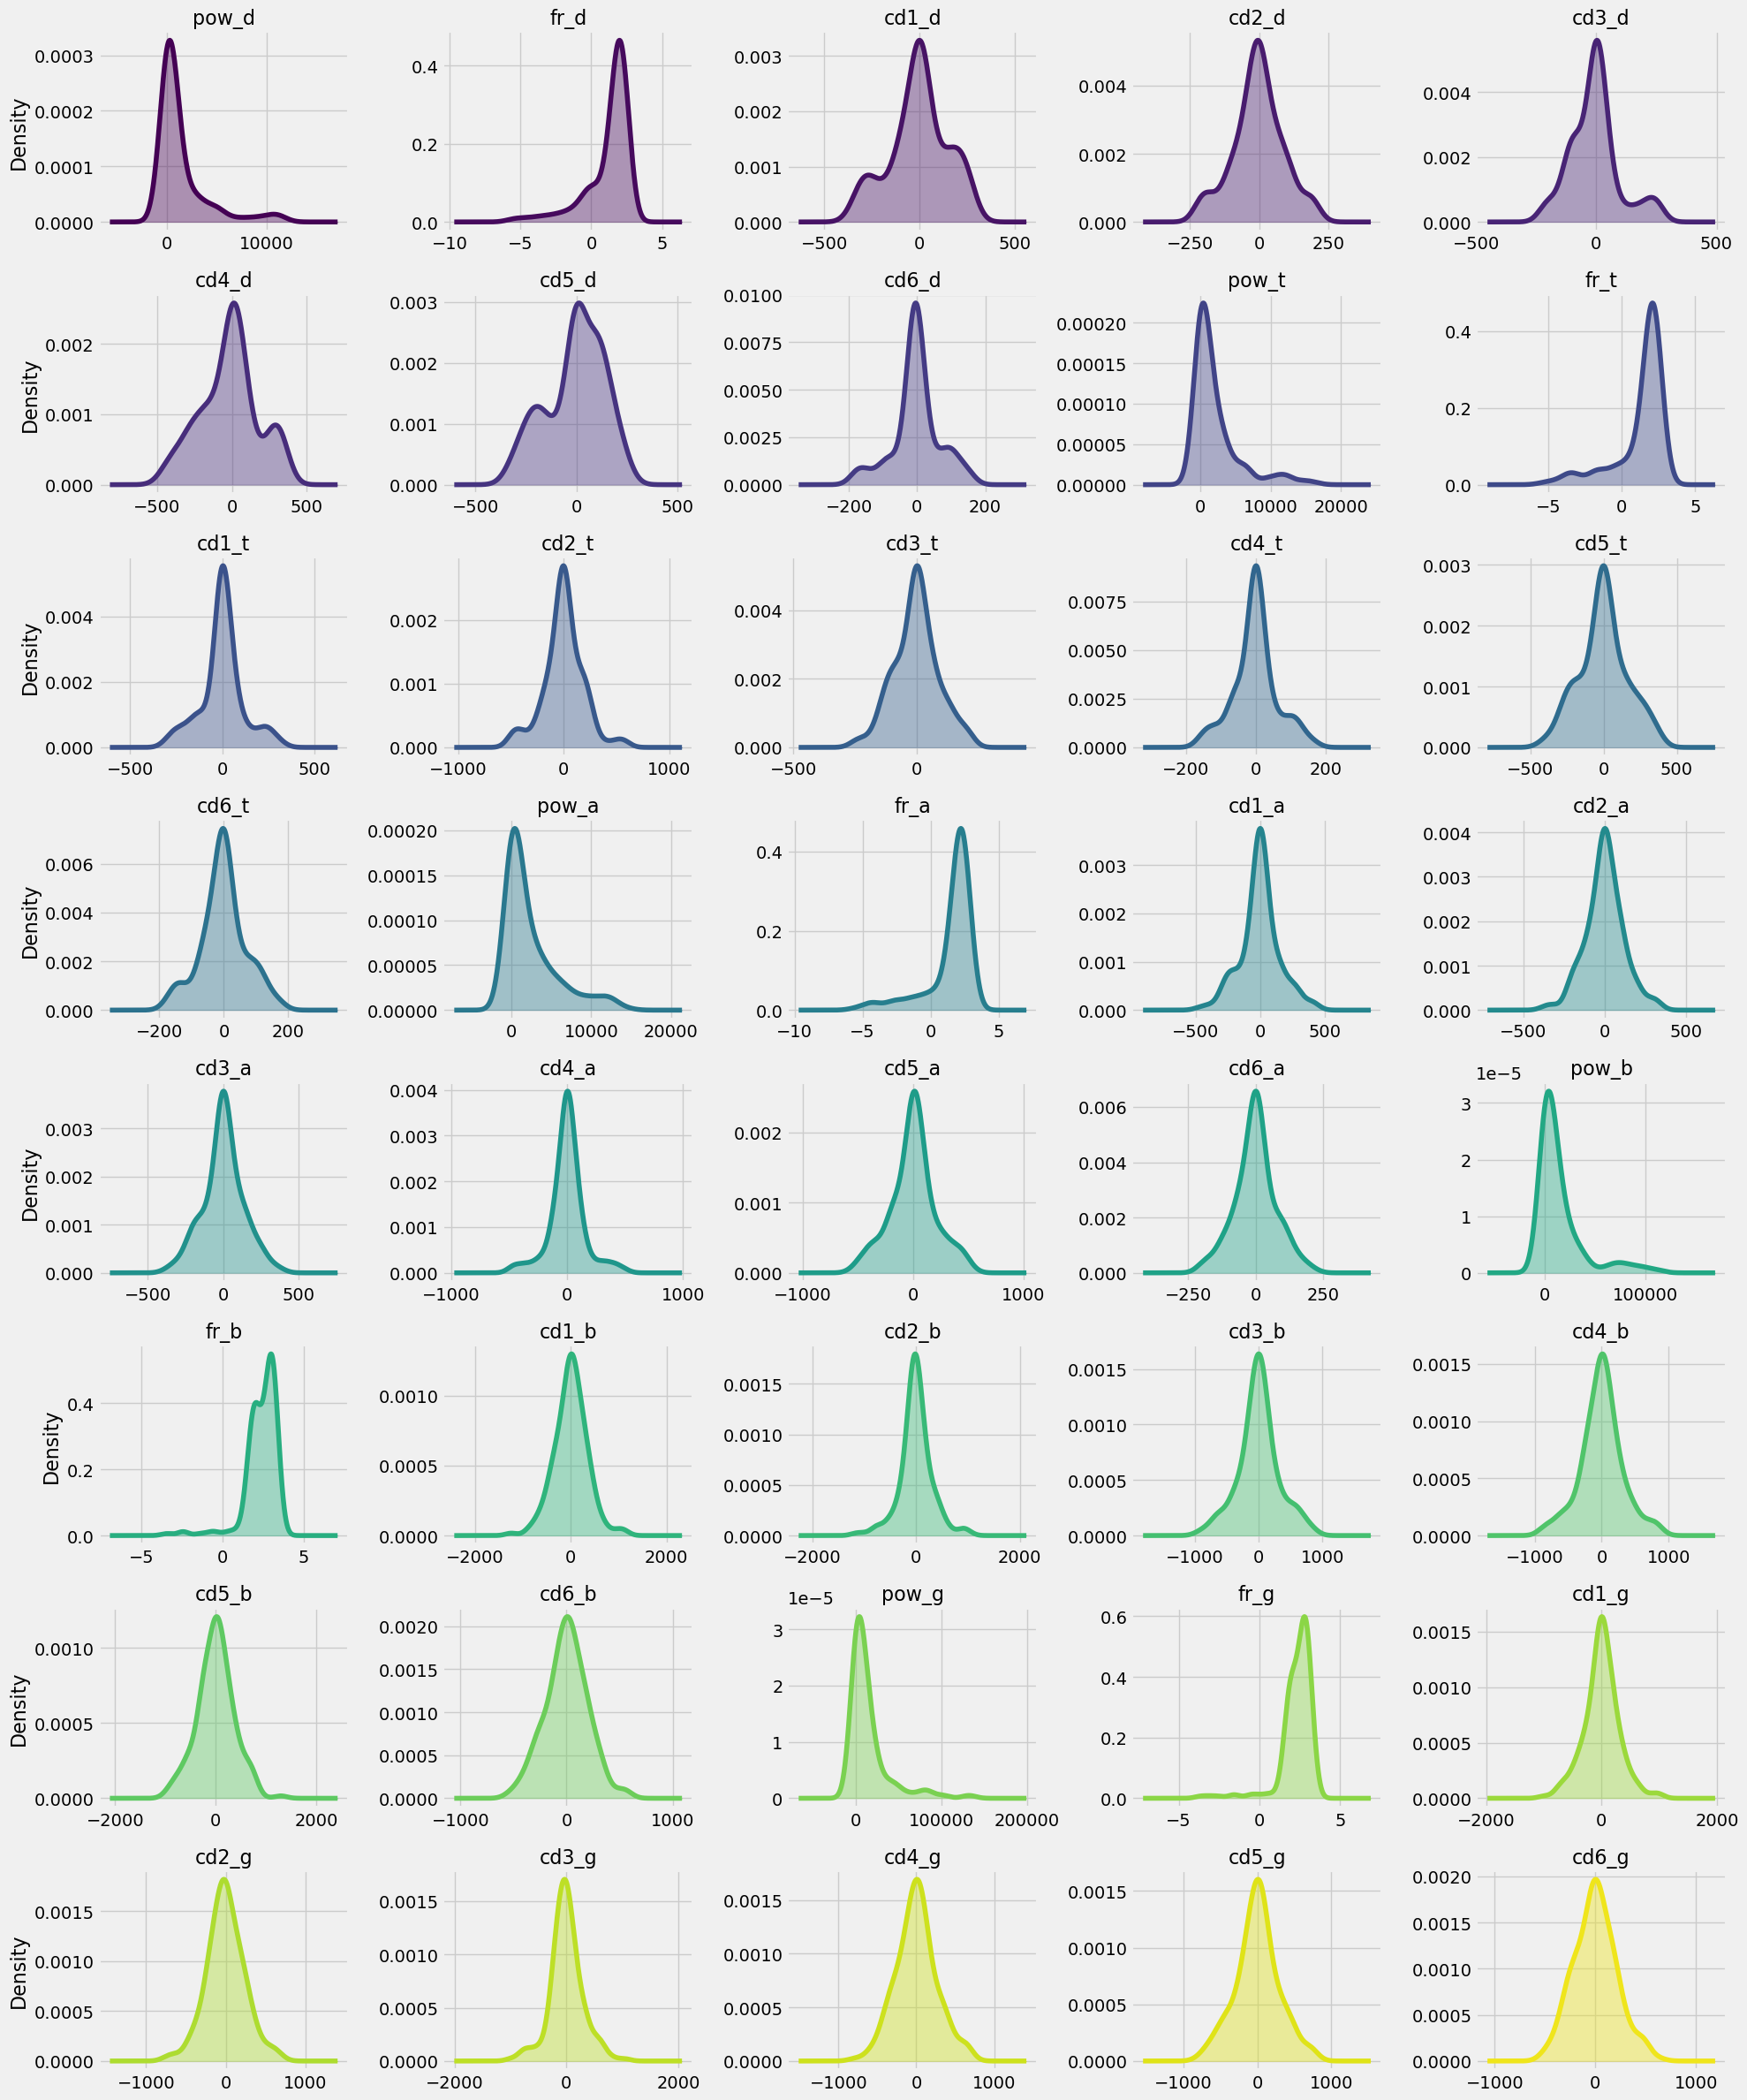

In [23]:
# Check distribution of the features
import math

# A function to get the dimensions of plot
def get_plot_dimension(dim: int):
    if dim % 2 != 0:
        dim += 1  # Ensure it's even for better grid shape

    for i in range(int(math.sqrt(dim)), 0, -1):
        if dim % i == 0:
            h, w = dim // i, i
            if h >= w:
                break
    return h, w

# Use a continuous colormap
def get_cmap_colors(cmap_name, n):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / n) for i in range(n)]

# Example:
columns = df.columns[1:-1]
n = len(columns)

colors = get_cmap_colors("viridis", n)

rows, cols = get_plot_dimension(n)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
ax = axes.ravel()

for i, col in enumerate(columns):
    line = df[col].plot(kind="kde", ax=ax[i], color=colors[i])
    ax[i].set_title(col, fontsize=16)

    x, y = line.get_lines()[0].get_data()

    ax[i].fill_between(x, y, color=colors[i], alpha=0.4)

    if i % cols == 0:
        ax[i].set_ylabel("Density", fontsize=16)
    else:
        ax[i].set_ylabel("")

if len(ax) > n:
    ax[-1].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_43656\4070340660.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


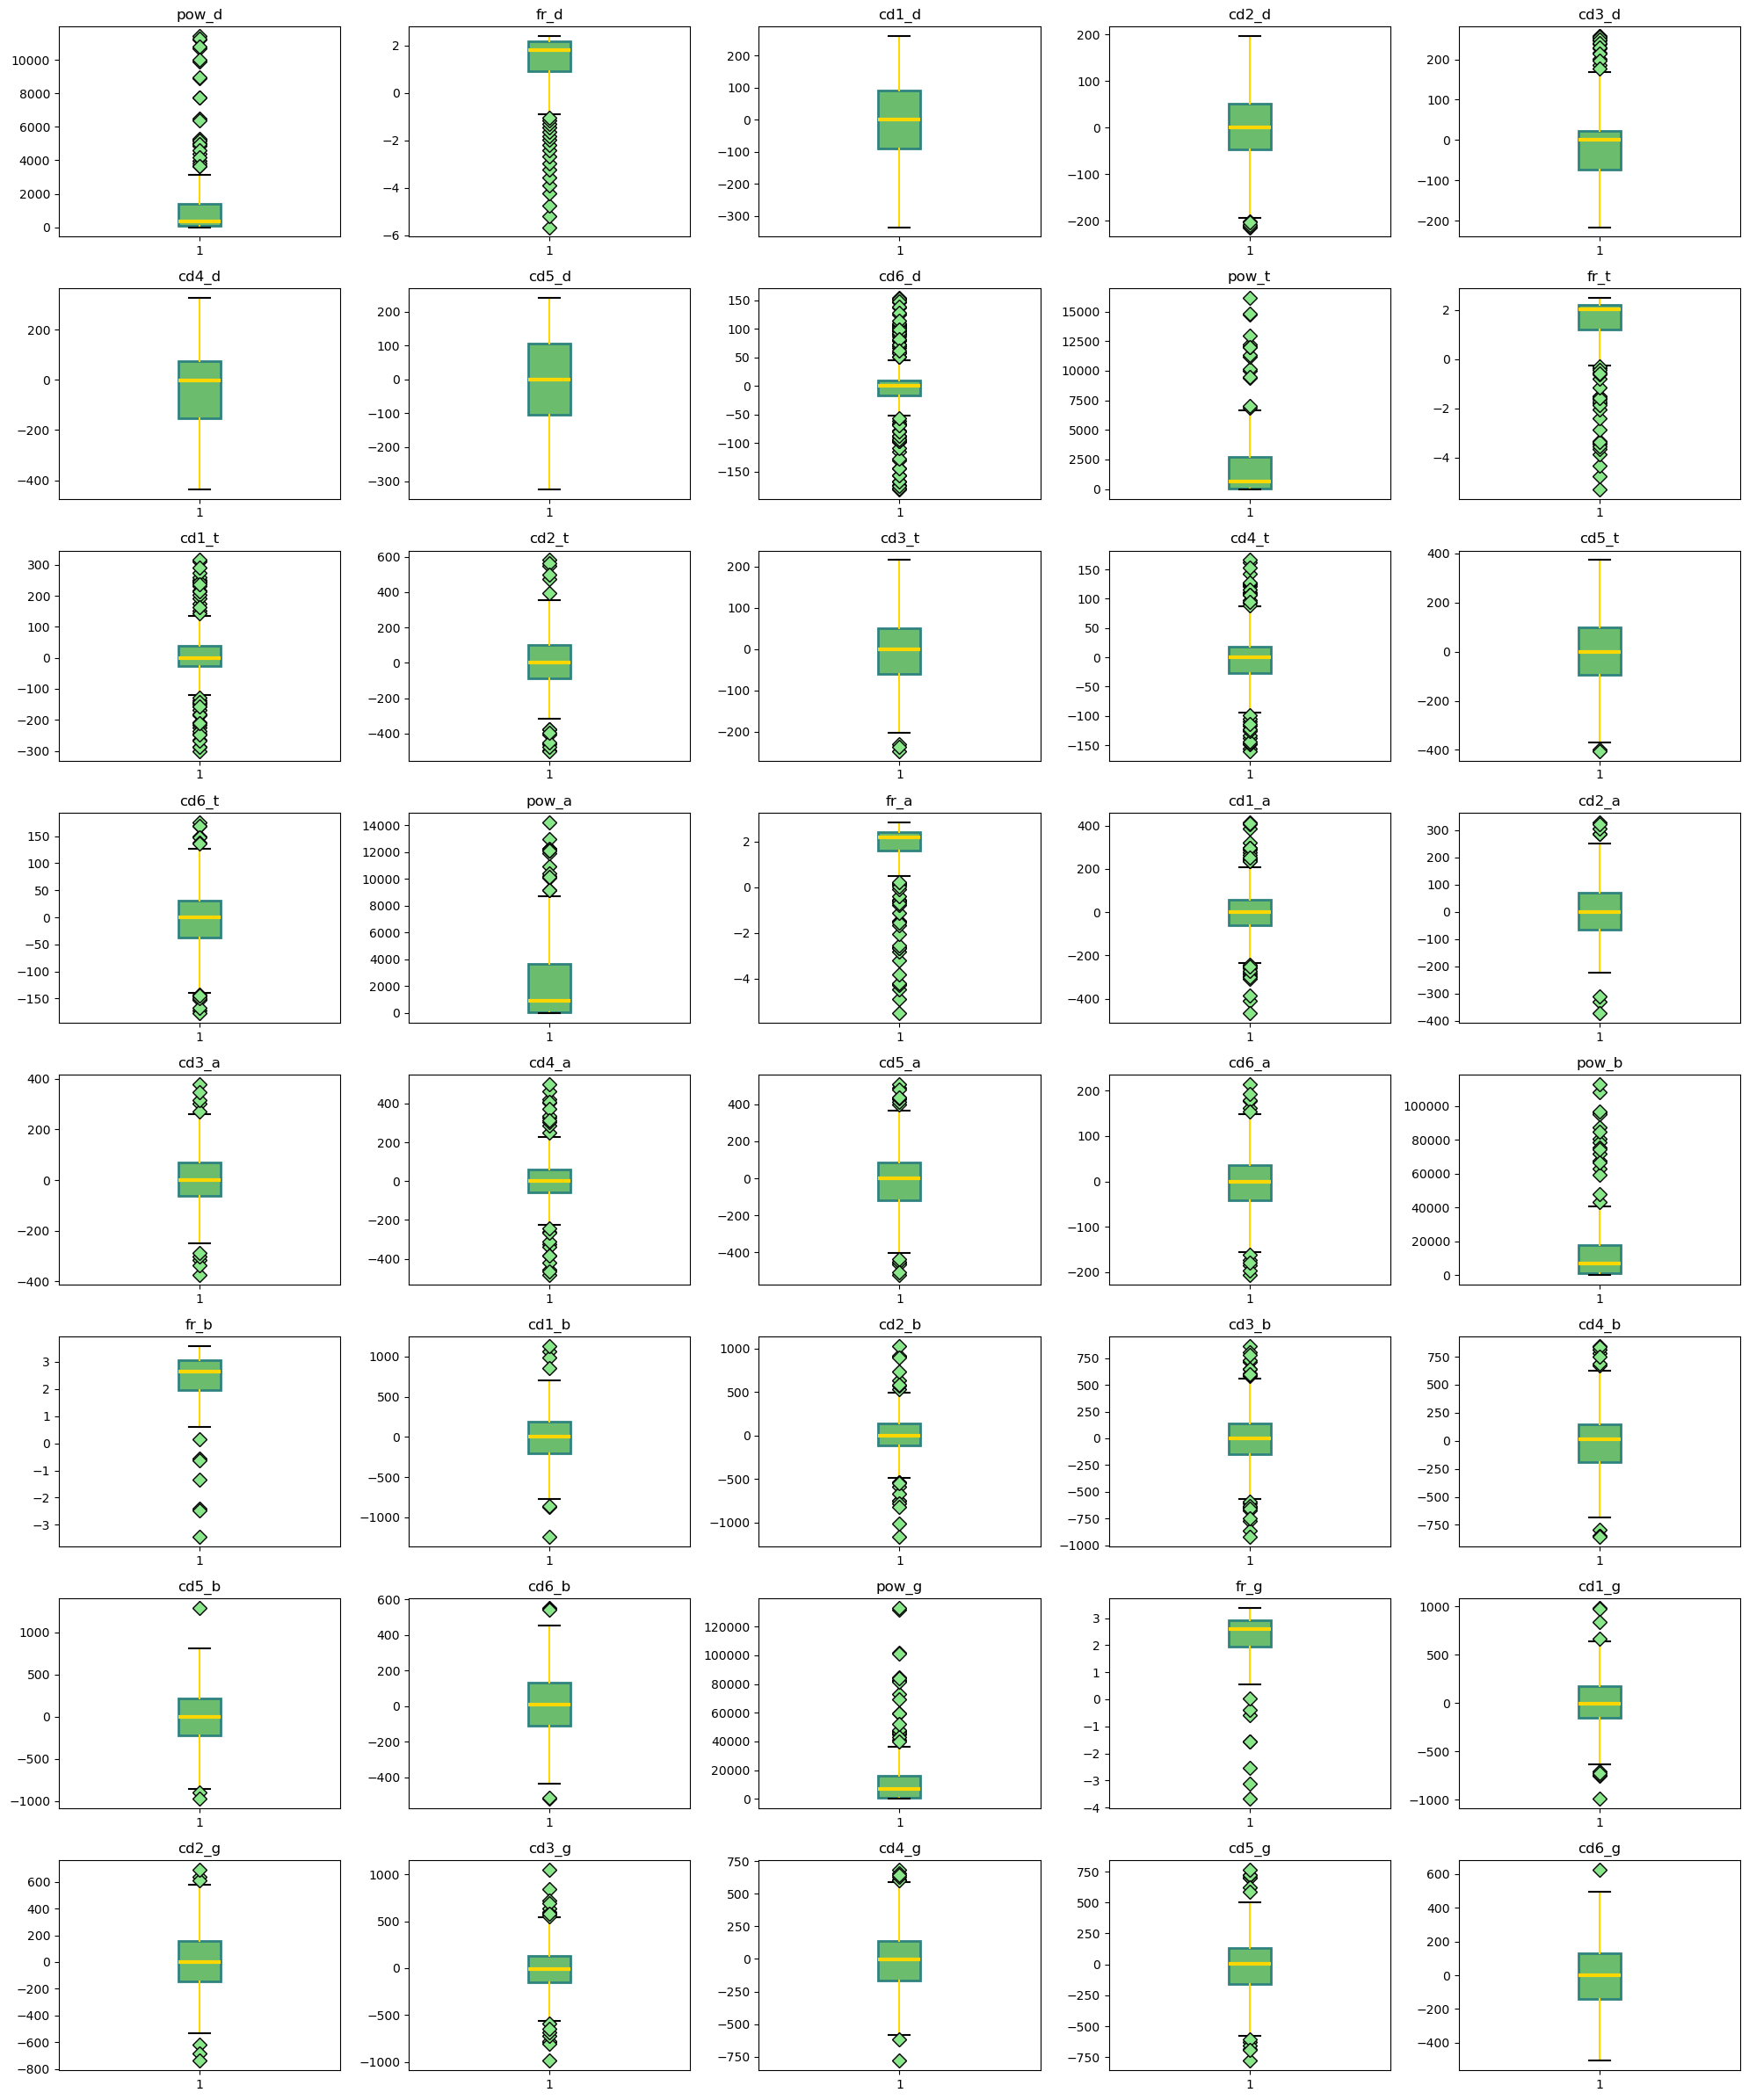

In [24]:
plt.style.use("default")
def get_cmap_colors(cmap_name, n):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / n) for i in range(n)]

# Check outliers
columns = df.columns[1:-1]

n = len(columns)

colors = get_cmap_colors("summer", n)

rows, cols = get_plot_dimension(len(columns))
fig, ax = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = ax.ravel()

for i, col in enumerate(columns):
    axes[i].boxplot(
        df[col],
        patch_artist=True,
        boxprops=dict(facecolor='#6CBC6E', edgecolor='#2F837F', linewidth=2),
        whiskerprops=dict(color='gold', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5),
        medianprops=dict(color='gold', linewidth=3),
        flierprops=dict(marker='D', markerfacecolor='#88E788', markersize=8)
    )
    axes[i].set_title(col, fontsize=12)

if len(axes) > len(columns):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

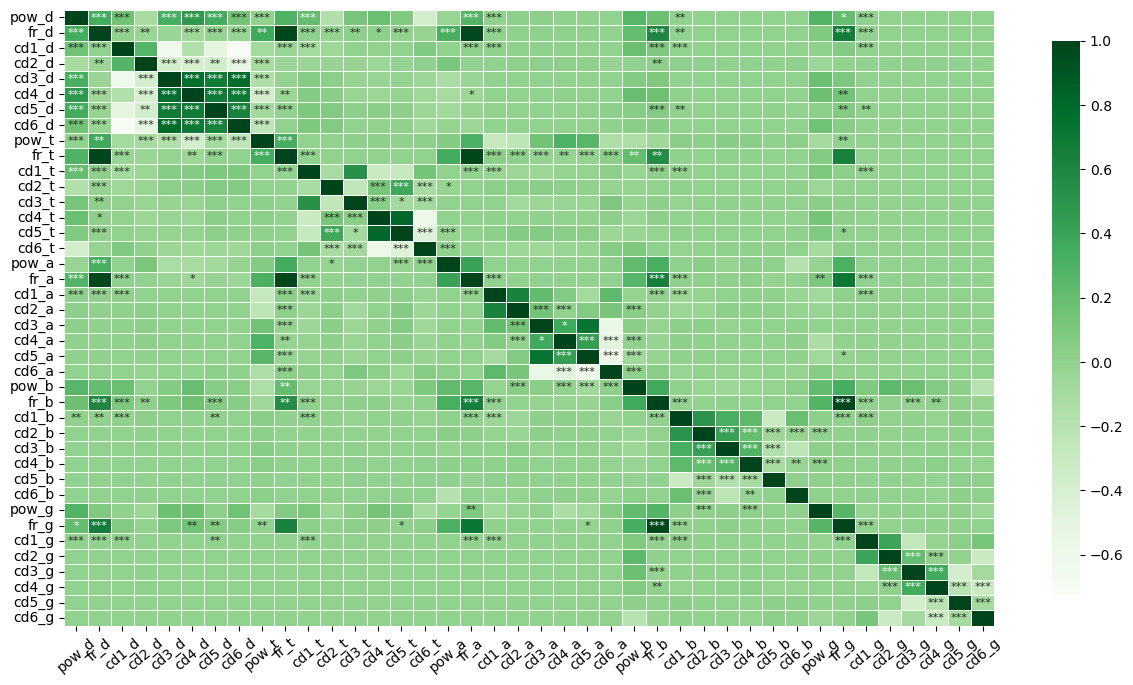

In [25]:
plt.style.use("default")

# Correlations
columns = df.columns[1:-1]
corr = df[columns].corr()
p_vals = df.apply(lambda x: df.corrwith(x, method=lambda a, b: pearsonr(a, b)[1]))

def asterisks(p_val):
    if p_val < 0.01:
        return "***"
    elif 0.01 <= p_val < 0.05:
        return "**"
    elif 0.05 <= p_val < 0.1:
        return "*"
    else:
        return "" 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    annot = corr.copy()
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if i > j:  # Lower triangle
                annot.iloc[i, j] = f'{asterisks(p_vals.iloc[i, j])}'
            elif i == j:
                annot.iloc[i, j] = ''
            else:  # Upper triangle
                annot.iloc[i, j] = f'{asterisks(p_vals.iloc[i, j])}'

    combined = corr.copy()
    for i in range(combined.shape[0]):
        for j in range(combined.shape[1]):
            if i < j:
                combined.iloc[i, j] = corr.iloc[i, j]
            elif i == j:
                combined.iloc[i, j] = 1

    f, ax = plt.subplots(figsize=(15, 8))

    sns.heatmap(
        combined, annot=annot, fmt='', cmap='Greens',
        linewidths=.5, cbar_kws={"shrink": .9}, annot_kws={"fontsize": 8}
    )

    for i in range(combined.shape[0]):
        ax.add_patch(plt.Rectangle((i, i), 0, 0, fill=True, color='#08306C', edgecolor='white'))

plt.xticks(rotation=40)
plt.show()

## Preprocessing

In [27]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Data processing function
def preprocess_data(df):
    df = df.copy()
    df['stat'] = df['stat'].map({1: 1, 2: 0})  # Binary encode target
    cols_to_drop = ['ID', 'cd4_d', 'cd5_d', 'cd6_d']
    if 'ID' in df.columns:
        df.drop(columns='ID', inplace=True)

    X = df.drop('stat', axis=1)
    y = df['stat']

    # IQR-based outlier capping
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_capped = X.clip(lower=lower, upper=upper, axis=1)

    return X_capped, y


In [29]:
# Perform train-test split
X = y = None

X, y = preprocess_data(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Testing samples: {X_test_scaled.shape[0]}")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

Training samples: 158
Testing samples: 40


['scaler.pkl']

## Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay, confusion_matrix
)

In [32]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # collect metrics
    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Sensitivity": recall_score(y_test, y_pred),  # a.k.a. recall
        "Specificity": tn / (tn + fp),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }

    return results, y_proba


=== Logistic Regression ===

=== Support Vector Machine ===

=== K-Nearest Neighbors ===


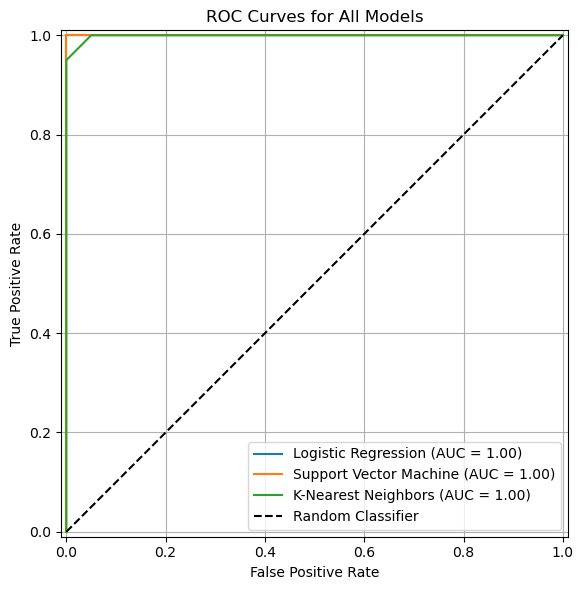


=== Evaluation Summary ===


,Accuracy,Precision,Sensitivity,Specificity,F1 Score,AUC
Model,,,,,,
Logistic Regression,0.975,1.000000,0.95,1.00,0.974359,1.00000
Support Vector Machine,1.000,1.000000,1.00,1.00,1.000000,1.00000
K-Nearest Neighbors,0.975,0.952381,1.00,0.95,0.975610,0.99875


In [33]:
# Loop through models, train them, and extract evaluation metrics
results_list = []
roc_plot_data = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train)

    metrics, y_proba = evaluate_model(model, X_test_scaled, y_test)
    metrics["Model"] = name
    results_list.append(metrics)

    roc_plot_data.append((name, y_proba))

# Convert results to DataFrame
results_df = pd.DataFrame(results_list).set_index("Model")

# Plot ROC Curves
plt.figure(figsize=(7, 6))
for name, y_proba in roc_plot_data:
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

print("\n=== Evaluation Summary ===")
results_df

In [34]:
y_test.value_counts()

stat
0    20
1    20
Name: count, dtype: int64

# Performance Optimisation

In [36]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan']
}


In [37]:
# Use stratified 5-fold CV
cv = 5

grid_models = {
    "Logistic Regression": GridSearchCV(LogisticRegression(), logreg_params, cv=cv, scoring='roc_auc'),
    "Support Vector Machine": GridSearchCV(SVC(probability=True), svm_params, cv=cv, scoring='roc_auc'),
    "K-Nearest Neighbors": GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, scoring='roc_auc'),
}


In [38]:
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

results_list = []
roc_plot_data = []
confusion_matrices = {}

os.makedirs("models", exist_ok=True)
os.makedirs("confusion_matrix_figures", exist_ok=True)

for name, grid in grid_models.items():
    print(f"\n=== Optimizing {name} ===")
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_

    print(f"Best Parameters: {grid.best_params_}")
    
    # Save the best model
    filename = f"models/{name.replace(' ', '_').lower()}_best.pkl"
    joblib.dump(best_model, filename)
    print(f"Saved tuned model to: {filename}")

    # Evaluate
    metrics, y_proba = evaluate_model(best_model, X_test_scaled, y_test)
    metrics["Model"] = name
    results_list.append(metrics)
    roc_plot_data.append((name, y_proba))

    # Confusion matrix
    y_pred = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, 
        index=[f"Actual {label}" for label in best_model.classes_],
        columns=[f"Predicted {label}" for label in best_model.classes_]
    )
    confusion_matrices[name] = cm_df

    # Plot and save confusion matrix as a figure
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    fig_path = f"confusion_matrix_figures/{name.replace(' ', '_').lower()}_confusion_matrix.png"
    plt.savefig(fig_path)
    plt.close()
    print(f"Saved confusion matrix figure to: {fig_path}")

print("\n=== Confusion Matrices ===")
for model_name, cm_df in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:\n{cm_df}\n")

with pd.ExcelWriter("confusion_matrix.xlsx", engine="openpyxl") as writer:
    for model_name, cm_df in confusion_matrices.items():
        sheet_name = model_name[:31]
        cm_df.to_excel(writer, sheet_name=sheet_name)



=== Optimizing Logistic Regression ===
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Saved tuned model to: models/logistic_regression_best.pkl
Saved confusion matrix figure to: confusion_matrix_figures/logistic_regression_confusion_matrix.png

=== Optimizing Support Vector Machine ===
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Saved tuned model to: models/support_vector_machine_best.pkl
Saved confusion matrix figure to: confusion_matrix_figures/support_vector_machine_confusion_matrix.png

=== Optimizing K-Nearest Neighbors ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Saved tuned model to: models/k-nearest_neighbors_best.pkl
Saved confusion matrix figure to: confusion_matrix_figures/k-nearest_neighbors_confusion_matrix.png

=== Confusion Matrices ===

Confusion Matrix for Logistic Regression:
          Predicted 0  Predicted 1
Actual 0           20            0
Actual 1            0           20


Confus

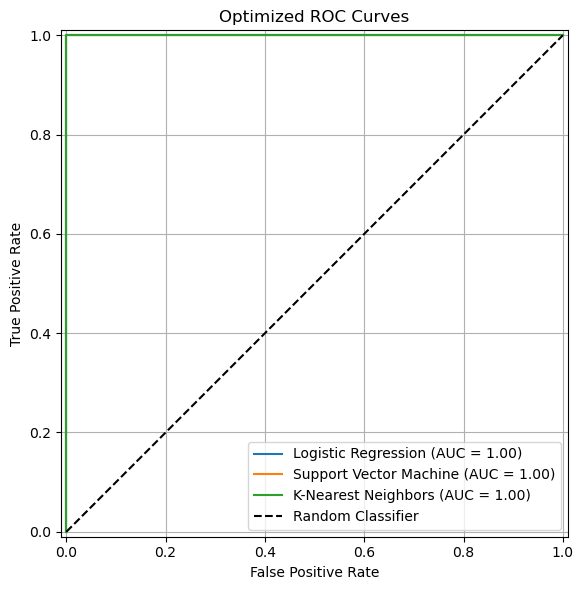


=== Optimized Model Evaluation Summary ===


,Accuracy,Precision,Sensitivity,Specificity,F1 Score,AUC
Model,,,,,,
Logistic Regression,1.000,1.000000,1.00,1.00,1.000000,1.0
Support Vector Machine,0.975,1.000000,0.95,1.00,0.974359,1.0
K-Nearest Neighbors,0.975,0.952381,1.00,0.95,0.975610,1.0


In [39]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_proba in roc_plot_data:
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Optimized ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results_list).set_index("Model")
print("\n=== Optimized Model Evaluation Summary ===")
results_df

## Explainable AI

In [43]:
pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
import shap
from tqdm import tqdm
shap.initjs()

C:\Users\Admin\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


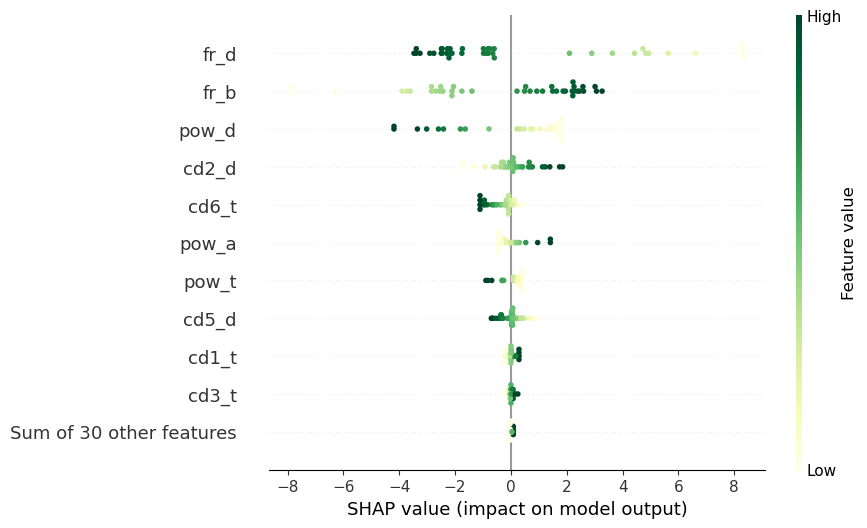

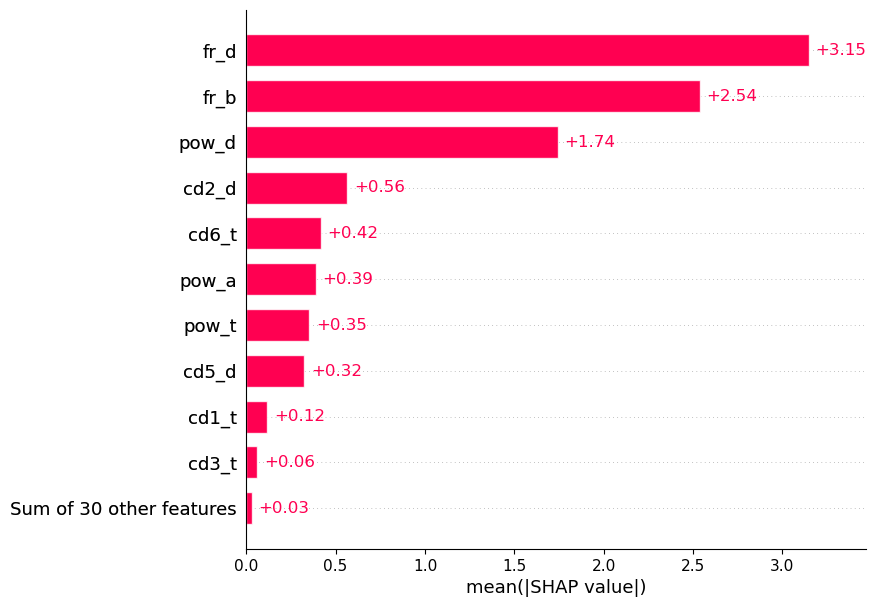

In [47]:
# Load the saved SVM model
logistic_model = joblib.load("models/logistic_regression_best.pkl")

explainer = shap.LinearExplainer(logistic_model, X_train_scaled, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_scaled)

shap_values_exp = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_scaled,
    feature_names=X_test_scaled.columns
)

shap.plots.beeswarm(shap_values_exp, color=plt.get_cmap("YlGn"), max_display=11)
shap.plots.bar(shap_values_exp, max_display=11)

## Minimum features for optimal performance

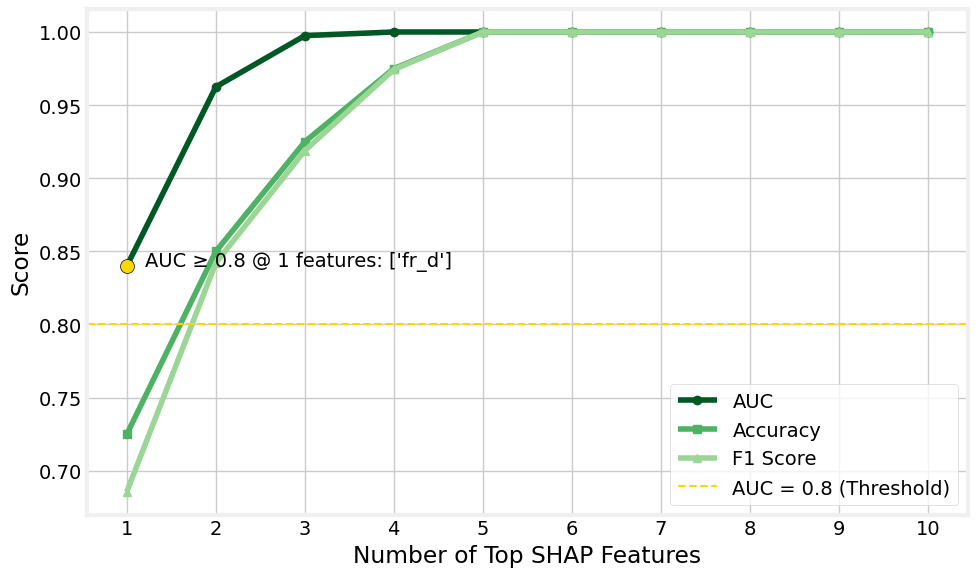

Minimum features needed for AUC ≥ 0.8: ['fr_d']


In [50]:
plt.style.use('fivethirtyeight')
X = df.drop(columns='stat')
y = df['stat']

# List of top features from SHAP ranking
shap_ranked_features = [
    'fr_d', 'fr_b', 'pow_d', 'cd2_d', 'cd6_t',
    'pow_a', 'pow_t', 'cd5_d', 'cd1_t', 'cd3_t'
]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# To store results
auc_scores = []
acc_scores = []
f1_scores = []
selected_features = []
min_features_for_auc_80 = None

# Incrementally train and evaluate model
for i in range(len(shap_ranked_features)):
    selected_features.append(shap_ranked_features[i])
    
    model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1')
    model.fit(X_train[selected_features], y_train)
    
    y_pred = model.predict(X_test[selected_features])
    y_proba = model.predict_proba(X_test[selected_features])[:, 1]
    
    auc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    auc_scores.append(auc)
    acc_scores.append(acc)
    f1_scores.append(f1)

    # Store the first time AUC >= 0.8
    if auc >= 0.8 and min_features_for_auc_80 is None:
        min_features_for_auc_80 = {
            "index": i + 1,
            "features": selected_features.copy(),
            "auc": auc
        }

plt.figure(figsize=(10, 6), facecolor='white')
plt.gca().set_facecolor('white')  
x_vals = range(1, len(auc_scores) + 1)

plt.plot(x_vals, auc_scores, marker='o', label='AUC', color='#005924')
plt.plot(x_vals, acc_scores, marker='s', label='Accuracy', color='#4EB264')
plt.plot(x_vals, f1_scores, marker='^', label='F1 Score', color='#9BD696')
plt.axhline(y=0.8, color='gold', linestyle='--', label='AUC = 0.8 (Threshold)', lw=1.5)

# Annotate where AUC >= 0.8 first occurs
if min_features_for_auc_80:
    idx = min_features_for_auc_80["index"]
    auc_val = min_features_for_auc_80["auc"]
    plt.scatter(idx, auc_val, color='gold', s=100, edgecolors='k', zorder=5)
    plt.text(idx + 0.2, auc_val, f'AUC ≥ 0.8 @ {idx} features: {min_features_for_auc_80['features']}', fontsize=14)

plt.xticks(ticks=x_vals)
plt.xlabel('Number of Top SHAP Features')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.grid(True)
plt.tight_layout()
plt.show()

if min_features_for_auc_80:
    print(f"Minimum features needed for AUC ≥ 0.8: {min_features_for_auc_80['features']}")